In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df.shape

(1000, 40)

Data set has 1000 rows and 40 columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

All the columns has 1000 non-null values except _c39.

The data types in the data set are integer,float and object.

In [5]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

Integer data type - months_as_customer,age,policy_number,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,propert_claim,vehicle_claim and auto_year.

Object data type - policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_reltionship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,inident_location,property_damage,police_report_available,auto_make,auto_model,and fraud_reported.

Float data type - policy_annual_premium and _c39.

In [6]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [7]:
df['collision_type'].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [8]:
df['authorities_contacted'].unique()

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

In [9]:
df['property_damage'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [10]:
df['police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [11]:
df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

The columns collision_type,property_damage and police_report_available has a value '?', need to replace that value.

In [12]:
#Checking which one is most frequently occuring in collision_type,property_damage and police_report_available.
print(df['collision_type'].mode())
print(df['property_damage'].mode())
print(df['police_report_available'].mode())

0    Rear Collision
dtype: object
0    ?
dtype: object
0     ?
1    NO
dtype: object


In [13]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [14]:
df['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [15]:
#Replacing the ' ?'  in collision_type,property_damage and police_report_available.
df['collision_type']=df['collision_type'].replace('?',df['collision_type'].mode()[0])
df['property_damage']=df['property_damage'].replace('?','NO')
df['police_report_available']=df['police_report_available'].replace('?',df['police_report_available'].mode()[1])

In [16]:
#Checking null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [17]:
#_c39 has 1000 null values so removing
df=df.drop('_c39',axis=1)

<AxesSubplot:>

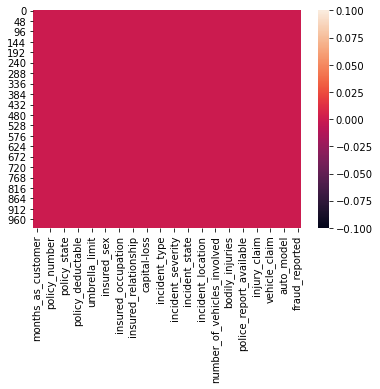

In [18]:
sns.heatmap(df.isnull())

No null value present.

In [19]:
#policy_bind_date and incident_date are object data type converting to datetime.

df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])


In [20]:
df['policy_bind_day']=df['policy_bind_date'].apply(lambda x:x.day)
df['policy_bind_month']=df['policy_bind_date'].apply(lambda x:x.month)
df['policy_bind_year']=df['policy_bind_date'].apply(lambda x:x.year)

df['incident_day']=df['incident_date'].apply(lambda x:x.day)
df['incident_month']=df['incident_date'].apply(lambda x:x.month)

#Removing policy_bind_date and incident_date
df=df.drop(['policy_bind_date','incident_date'],axis=1)

In [21]:
df.shape

(1000, 42)

In [22]:
df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,...,0.062108,0.065329,0.034940,0.061013,-0.000292,0.051728,0.005750,-0.048276,-0.011092,0.024659
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,...,0.069863,0.075522,0.060898,0.062588,0.001354,0.053869,0.015501,-0.037444,-0.006131,0.023404
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,...,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,0.041885,0.005509,-0.040099,0.057199,-0.042512
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,...,0.022839,0.039107,0.064792,0.005269,0.026105,0.009164,-0.050416,-0.049598,-0.018160,-0.006418
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,...,0.009094,-0.017633,-0.011654,0.020246,-0.049226,-0.025183,-0.035355,0.001249,0.014835,0.021559
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,...,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,-0.045207,0.009961,0.048008,-0.021716,0.042409
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,...,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,-0.039867,0.015864,-0.001100,0.019095,0.005461
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,...,0.015980,0.025934,-0.000779,0.015836,0.031398,0.007994,-0.011102,0.041249,0.015418,0.029409
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,...,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,-0.038297,0.003436,-0.026420,-0.015035,0.023216
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,...,0.217702,0.165768,0.179536,0.215626,0.021368,-0.009511,-0.000934,0.035412,-0.027965,0.044827


In [23]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,...,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,15.448000,6.559000,2001.604000,13.08400,3.407000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,...,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,8.850176,3.391758,7.360391,10.44318,3.276291
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,...,100.00000,0.000000,0.000000,70.000000,1995.000000,1.000000,1.000000,1990.000000,1.00000,1.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,...,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,8.000000,4.000000,1995.000000,2.00000,1.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,...,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,16.000000,7.000000,2002.000000,15.00000,2.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,...,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,23.000000,9.000000,2008.000000,22.00000,5.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,...,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,31.000000,12.000000,2015.000000,31.00000,12.000000


# Data Visualization

In [24]:
cat=df[['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_location','property_damage','insured_relationship','police_report_available','auto_make','auto_model','fraud_reported']]
con=df[['months_as_customer','age','policy_number','policy_deductable','policy_annual_premium','umbrella_limit','insured_zip','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_year','policy_bind_day','policy_bind_month','policy_bind_year','incident_day','incident_month']]

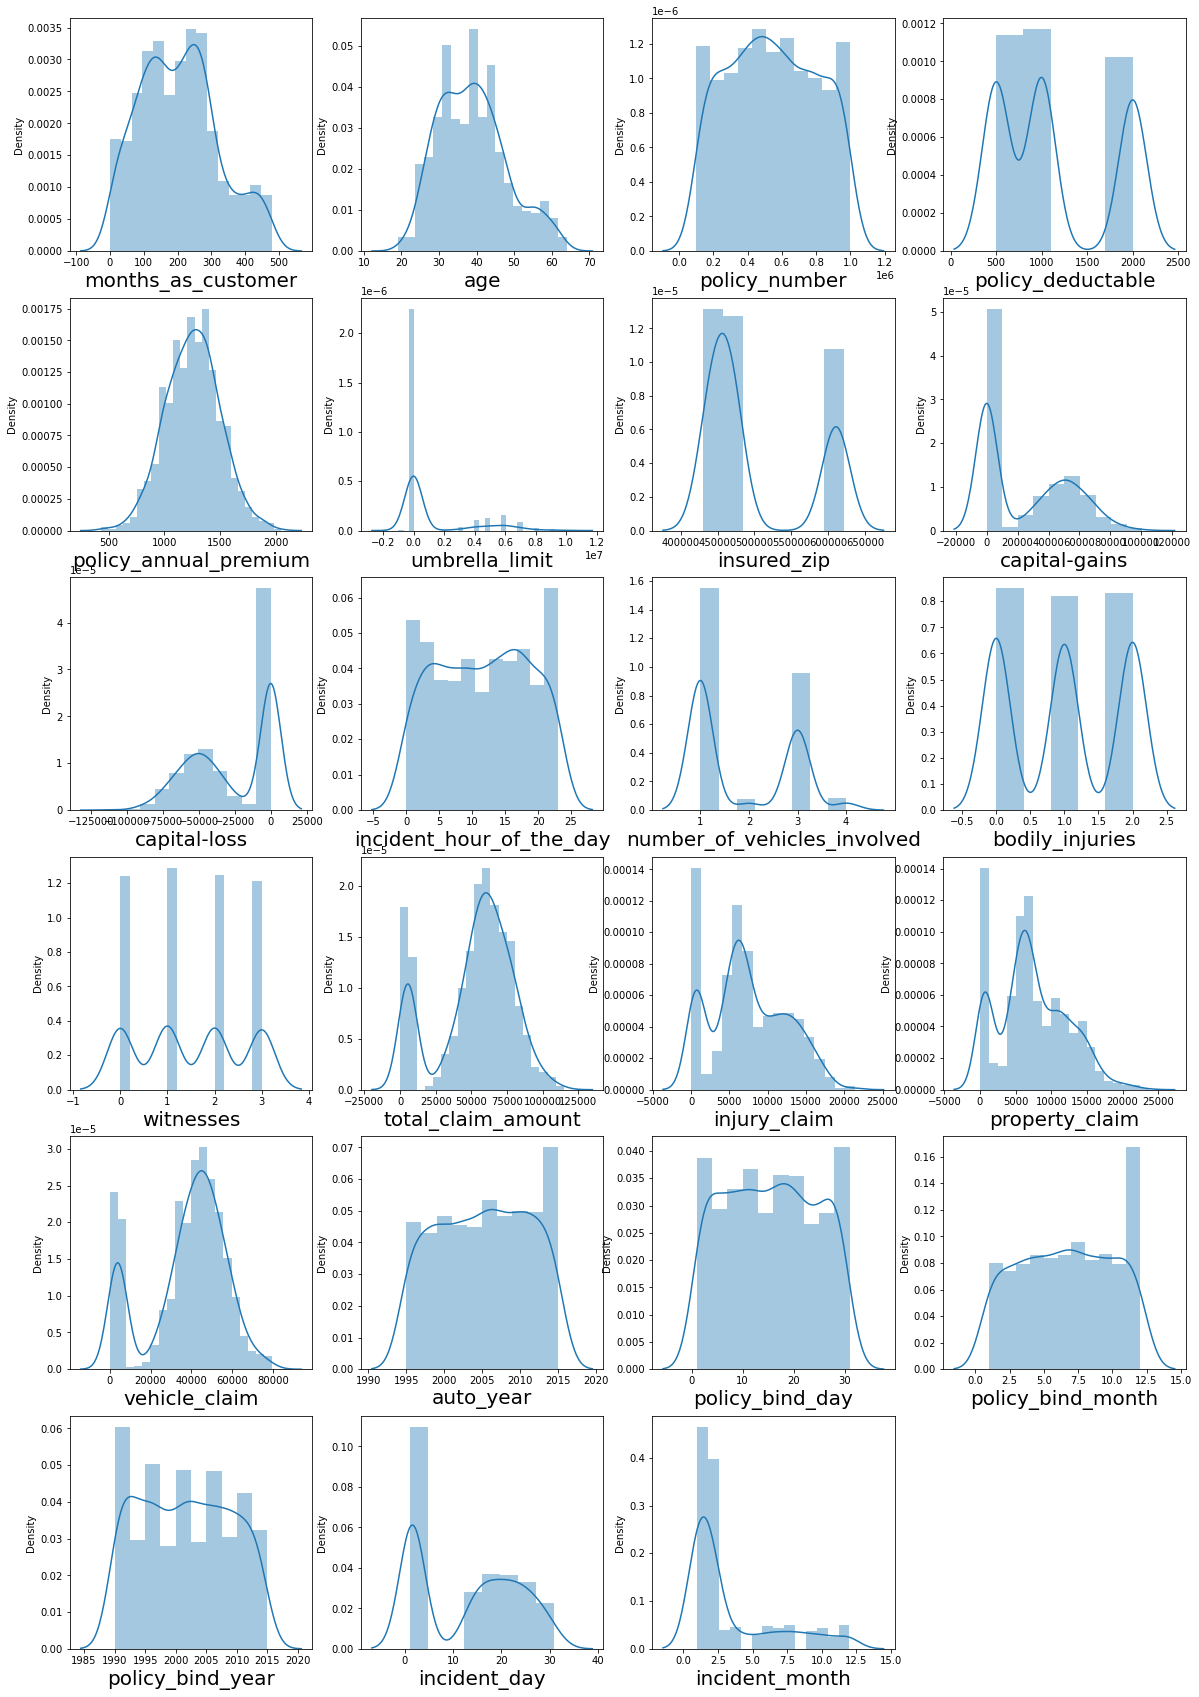

In [25]:
plt.figure(figsize=(20,30))
plotnumber=1

for i in con:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(con[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

In [26]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
policy_bind_day                0.024372
policy_bind_month             -0.029321
policy_bind_year               0.052511
incident_day                   0.059111
incident_month                 1.375894
dtype: float64

Small skewness in umbrella_limit and incident_month

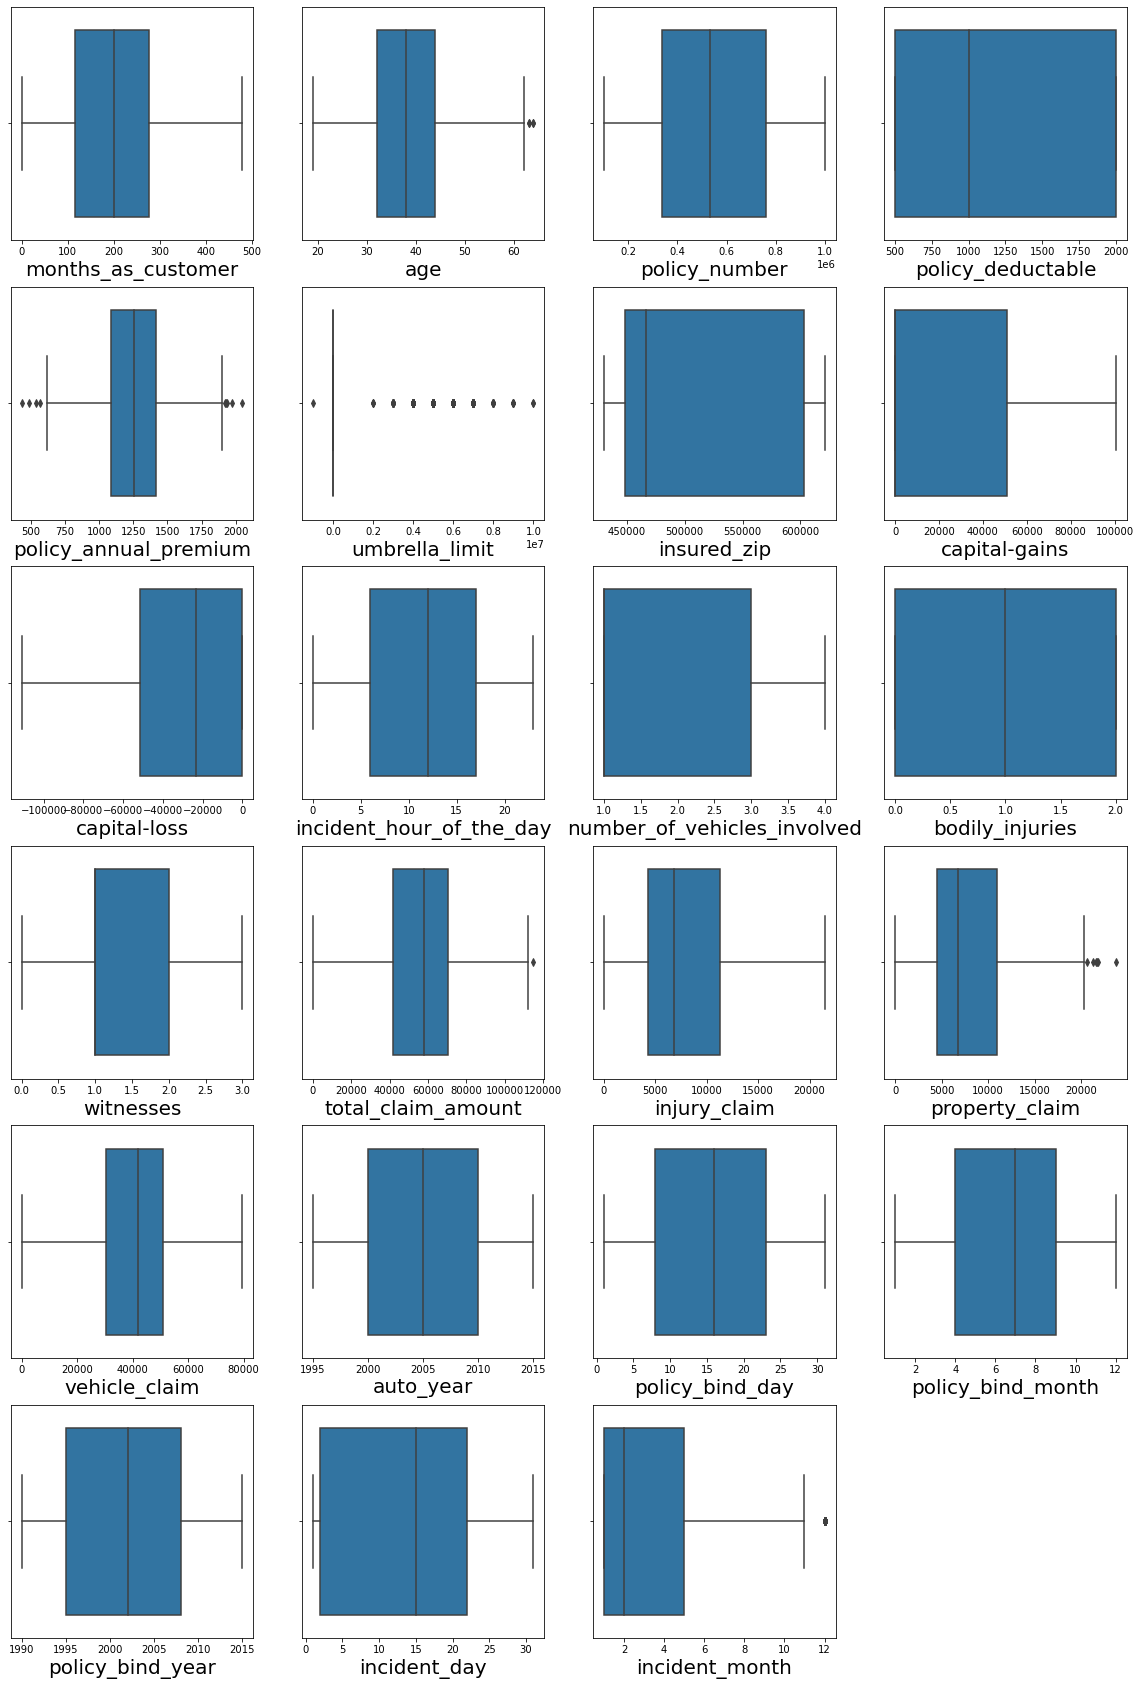

In [27]:
plt.figure(figsize=(20,30))
plotnumber=1

for i in con:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)
        sns.boxplot(con[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

Outliers are present in age,policy_annual_premium,umbrella_limit and property_claim.

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

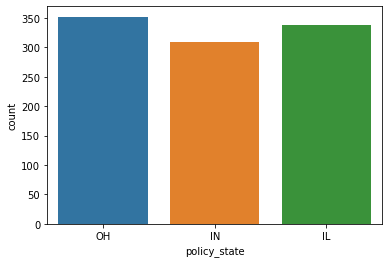

In [28]:
sns.countplot('policy_state',data=df)
df['policy_state'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

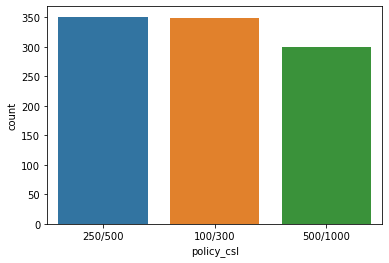

In [29]:
sns.countplot('policy_csl',data=df)
df['policy_csl'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

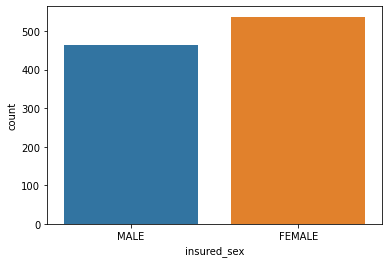

In [30]:
sns.countplot('insured_sex',data=df)
df['insured_sex'].value_counts()

In the column insured_sex, 537 of them is Female and 463 of them is Male.

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

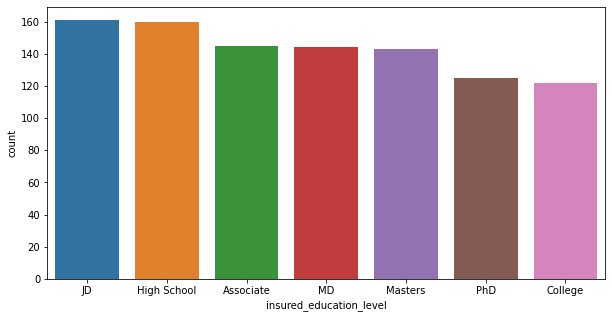

In [31]:
plt.figure(figsize=(10,5))
sns.countplot('insured_education_level',data=df,order=df['insured_education_level'].value_counts().sort_values(ascending=False).index)
df['insured_education_level'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

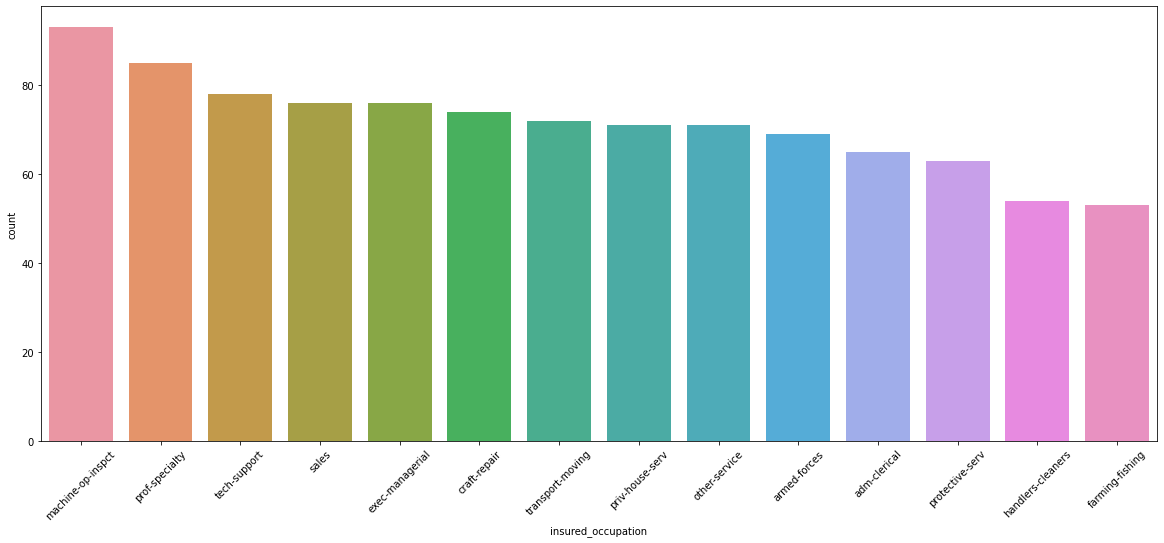

In [32]:
plt.figure(figsize=(20,8))
sns.countplot('insured_occupation',data=df,order=df['insured_occupation'].value_counts().sort_values(ascending=False).index)
plt.xticks(rotation='45')
df['insured_occupation'].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
camping           55
movies            55
golf              55
kayaking          54
yachting          53
hiking            52
video-games       50
base-jumping      49
skydiving         49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

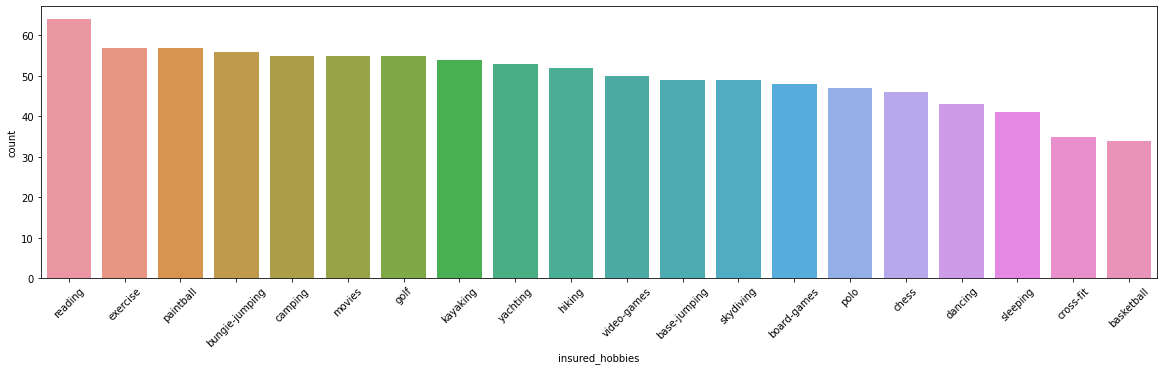

In [33]:
plt.figure(figsize=(20,5))
sns.countplot('insured_hobbies',data=df,order=df['insured_hobbies'].value_counts().sort_values(ascending=False).index)
plt.xticks(rotation='45')
df['insured_hobbies'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

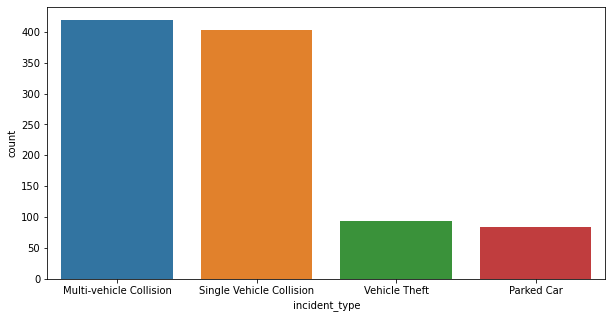

In [34]:
plt.figure(figsize=(10,5))
sns.countplot('incident_type',data=df,order=df['incident_type'].value_counts().sort_values(ascending=False).index)
df['incident_type'].value_counts()

In the data set 419 cases are of Multi-vehicle Collision incident type,403 Single Vehicle Collision type incident,94 Vehicle theft and 84 Parked card type incident.

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

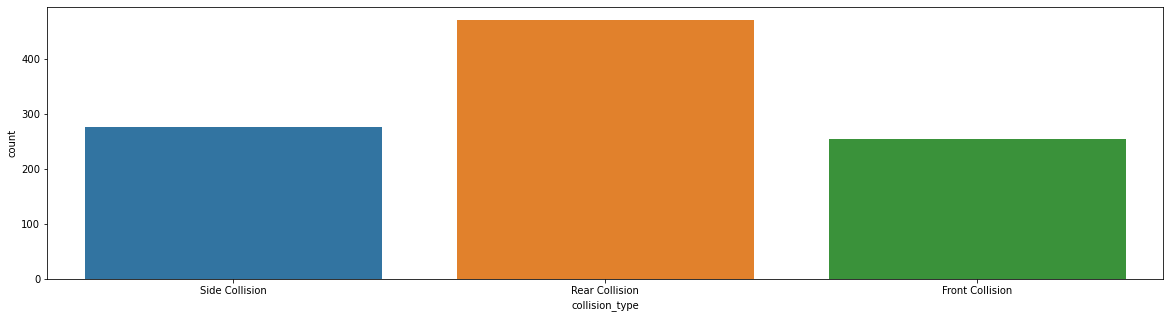

In [35]:
plt.figure(figsize=(20,5))
sns.countplot('collision_type',data=df)
df['collision_type'].value_counts()

470 incident are Rear collision type, 276 incident are side collision type and 254 incident are front collision type.

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

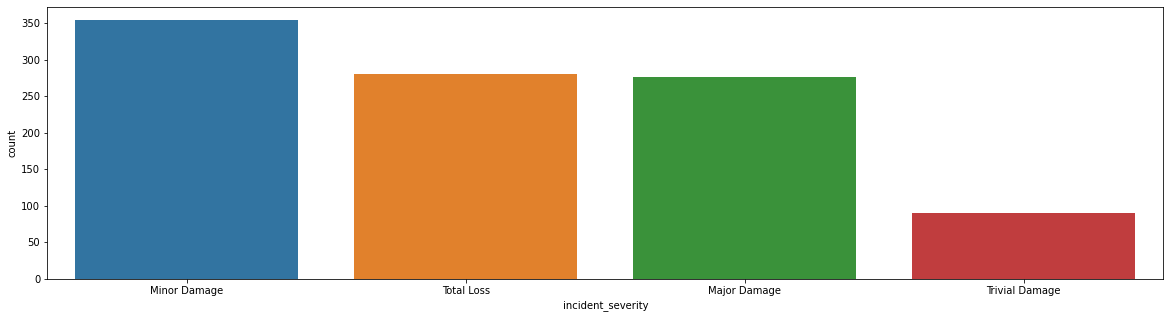

In [36]:
plt.figure(figsize=(20,5))
sns.countplot('incident_severity',data=df,order=df['incident_severity'].value_counts().sort_values(ascending=False).index)
df['incident_severity'].value_counts()

354 cases are with minor damage,280 cases with total loss, 276 cases with major damage and 90 cases with trivial damage.

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

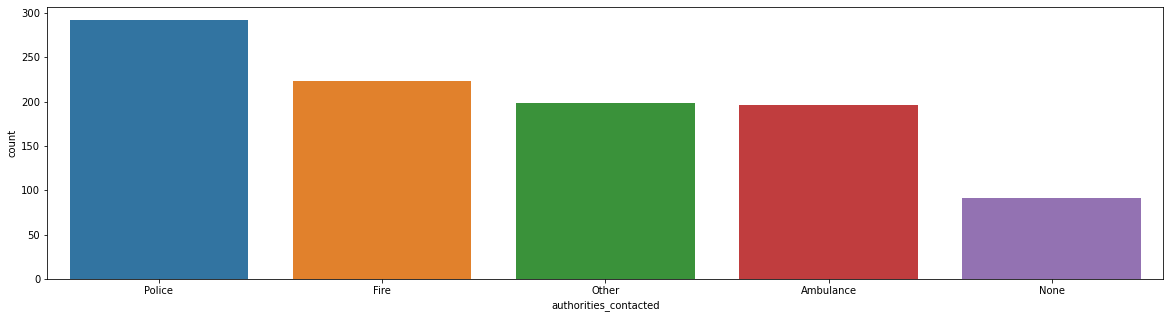

In [37]:
plt.figure(figsize=(20,5))
sns.countplot('authorities_contacted',data=df,order=df['authorities_contacted'].value_counts().sort_values(ascending=False).index)
df['authorities_contacted'].value_counts()

292 cases contacted police,223 cases contacted Fire, 198 cases contacted other, 196 cases contacted ambulance and 91 cases not contact anyone.

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64

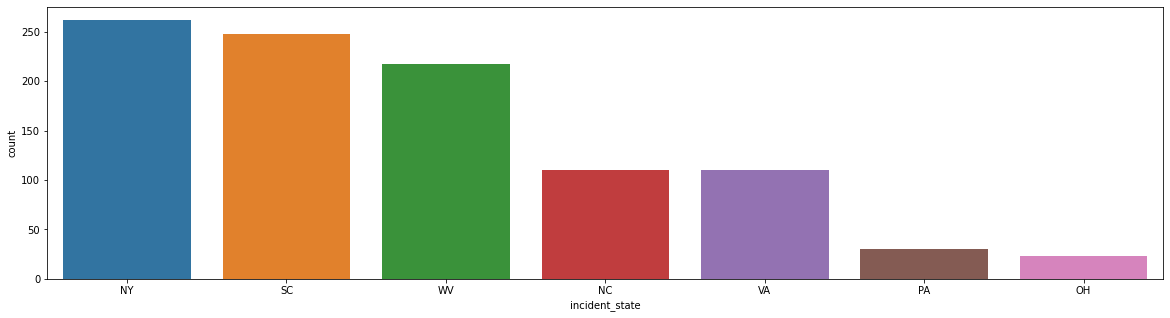

In [38]:
plt.figure(figsize=(20,5))
sns.countplot('incident_state',data=df,order=df['incident_state'].value_counts().sort_values(ascending=False).index)
df['incident_state'].value_counts()

262 incident are from NY,248 incident are from SC.217 incident are from WV,110 incident from VA and NC,30 incident from PA and 23 incident from OH.

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

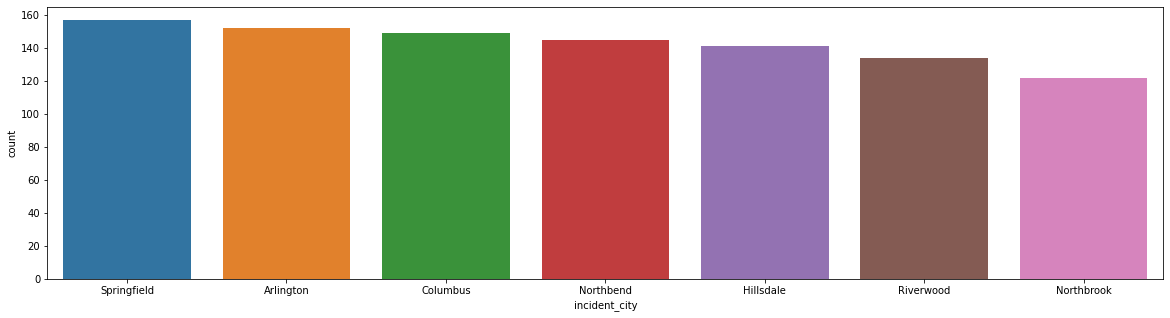

In [39]:
plt.figure(figsize=(20,5))
sns.countplot('incident_city',data=df,order=df['incident_city'].value_counts().sort_values(ascending=False).index)
df['incident_city'].value_counts()

In the column incident_city, 157 cases from Springfield,152 cases from Arlington,149 cases from Columbus,145 cases from Northbend,141 cases from Hillsdale,134 cases from Riverwood and 122 cases from Northbrook.

NO     698
YES    302
Name: property_damage, dtype: int64

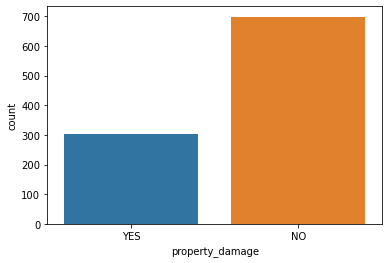

In [40]:
sns.countplot('property_damage',data=df)
df['property_damage'].value_counts()

In the data set 698 incident has no property damage, 302 incident has property damage.

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

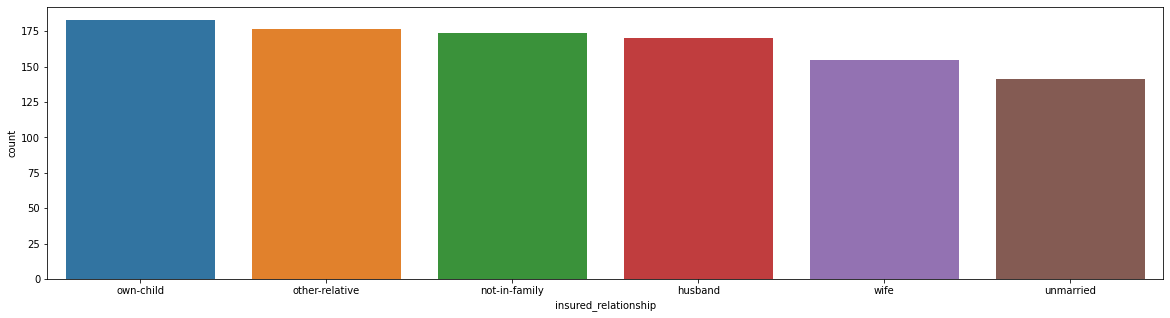

In [41]:
plt.figure(figsize=(20,5))
sns.countplot('insured_relationship',data=df,order=df['insured_relationship'].value_counts().sort_values(ascending=False).index)
df['insured_relationship'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

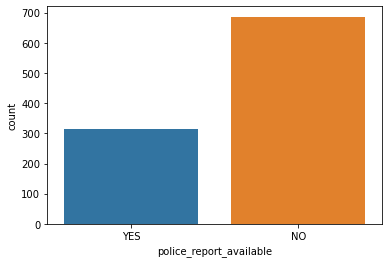

In [42]:
sns.countplot('police_report_available',data=df)
df['police_report_available'].value_counts()

There is no police report for 686 incident, only 314 cases has police report available.

Dodge         80
Saab          80
Suburu        80
Nissan        78
Chevrolet     76
BMW           72
Ford          72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

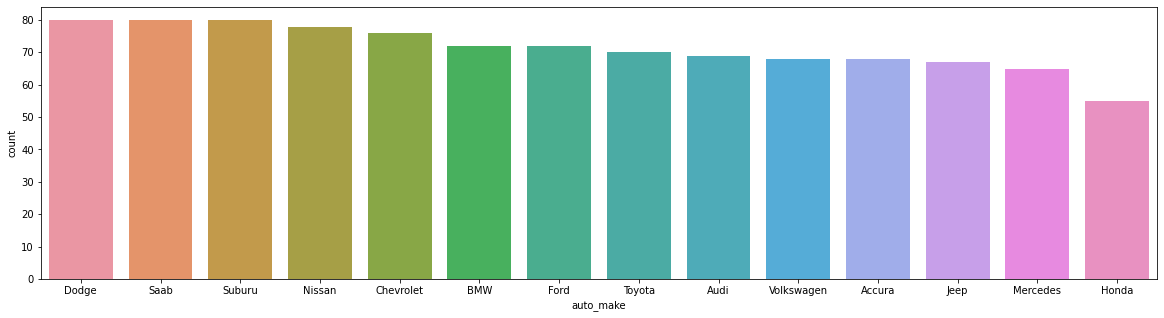

In [43]:
plt.figure(figsize=(20,5))
sns.countplot('auto_make',data=df,order=df['auto_make'].value_counts().sort_values(ascending=False).index)
df['auto_make'].value_counts()

RAM               43
Wrangler          42
Neon              37
A3                37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
Camry             28
Forrestor         28
92x               28
F150              27
E400              27
95                27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
CRV               20
Corolla           20
ML350             20
Impreza           20
TL                20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

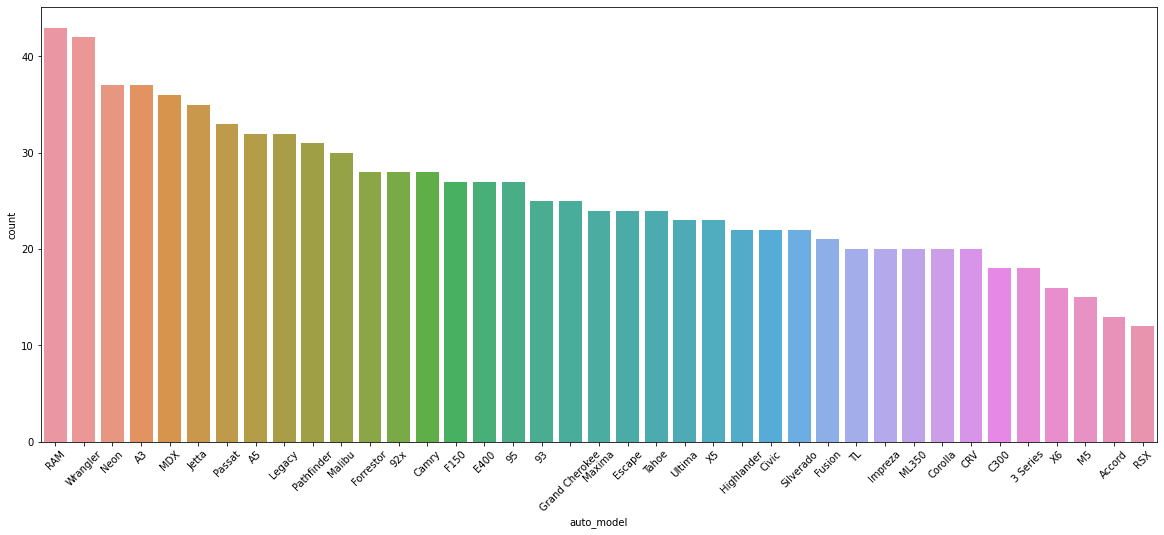

In [44]:
plt.figure(figsize=(20,8))
sns.countplot('auto_model',data=df,order=df['auto_model'].value_counts().sort_values(ascending=False).index)
plt.xticks(rotation='45')
df['auto_model'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

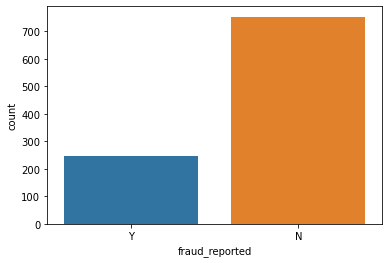

In [45]:
sns.countplot('fraud_reported',data=df)
df['fraud_reported'].value_counts()

753 incident not fraud cases,247 incidents are fraud cases.

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

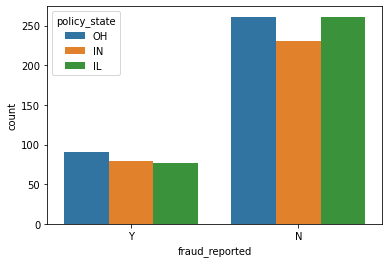

In [46]:
sns.countplot('fraud_reported',hue='policy_state',data=df.sort_values('fraud_reported',ascending=False))

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

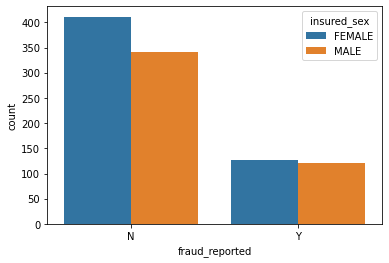

In [47]:
sns.countplot('fraud_reported',hue='insured_sex',data=df.sort_values('insured_sex'))

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

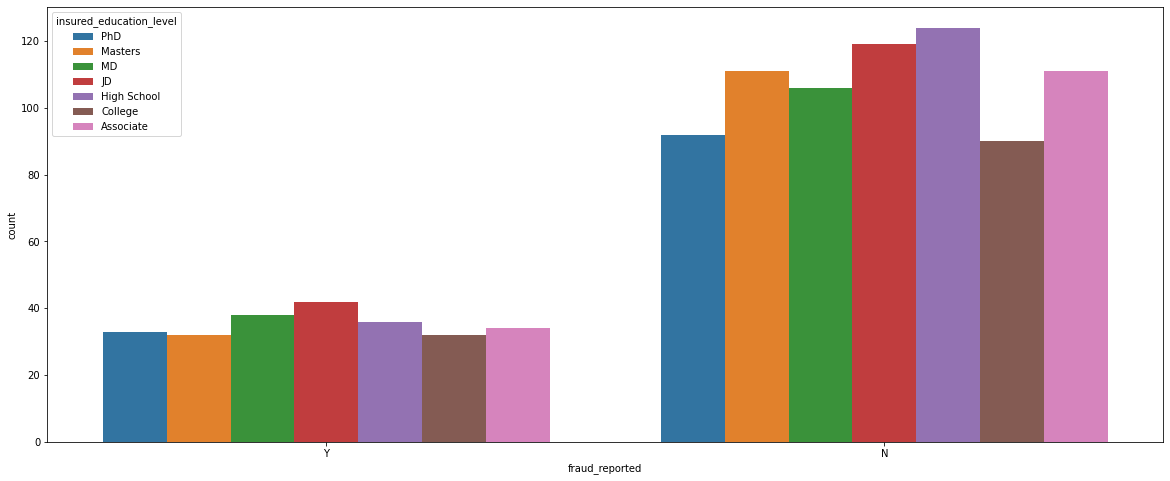

In [48]:
plt.figure(figsize=(20,8))
sns.countplot('fraud_reported',hue='insured_education_level',data=df.sort_values('insured_education_level',ascending=False))

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

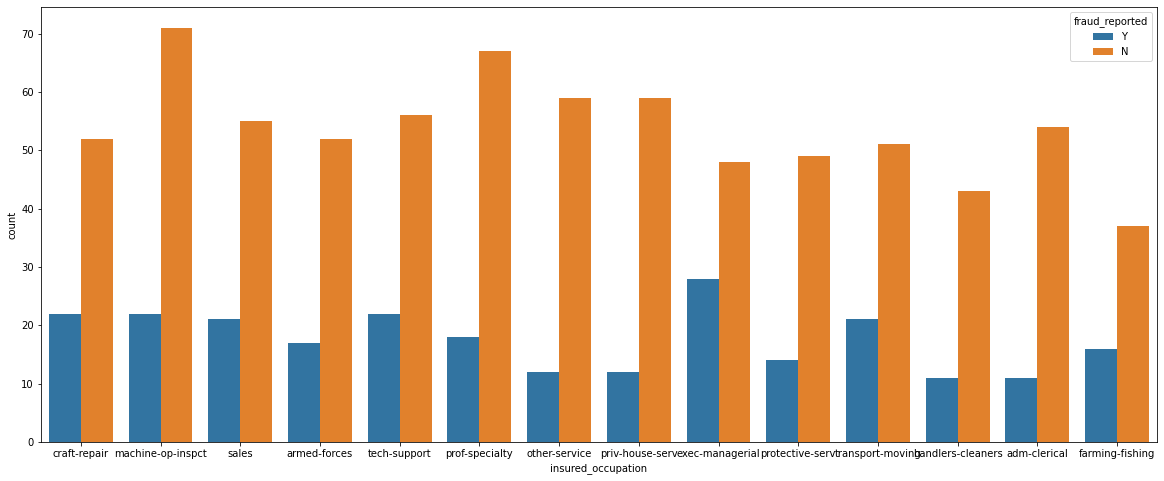

In [49]:
plt.figure(figsize=(20,8))
sns.countplot('insured_occupation',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

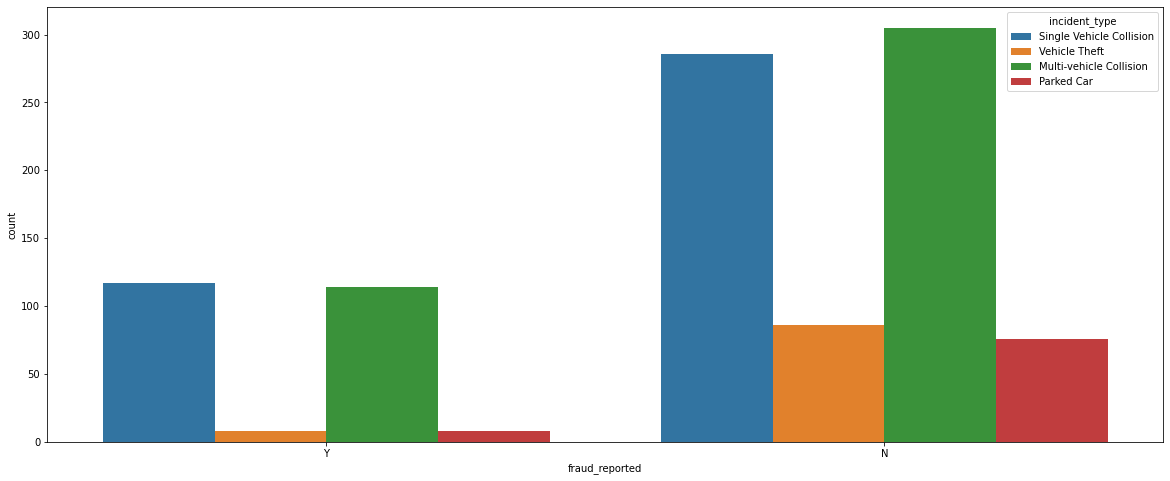

In [50]:
plt.figure(figsize=(20,8))
sns.countplot('fraud_reported',hue='incident_type',data=df)

mainly fraudent cases are in Single vehicle collision and Multi-vehicle Collision.

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

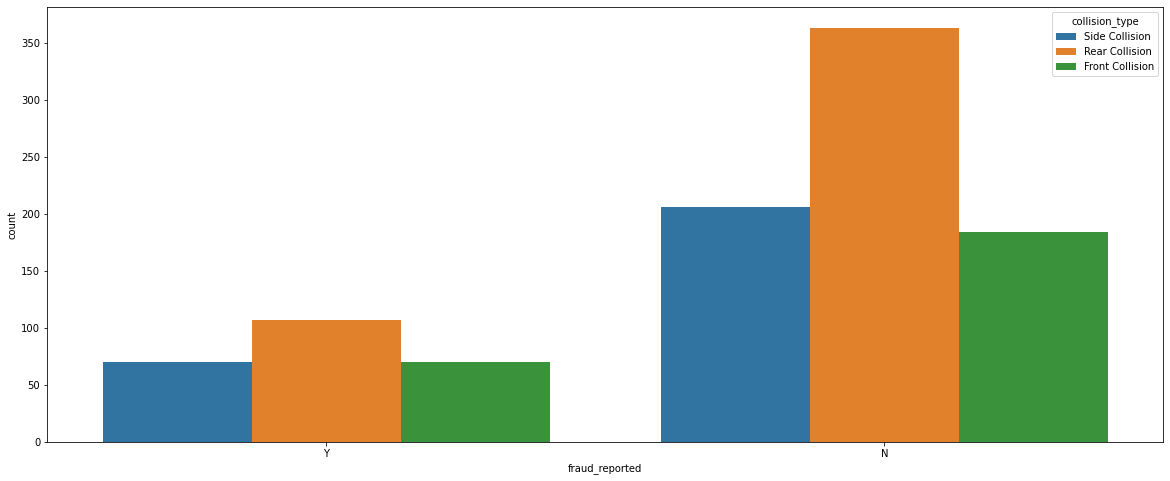

In [51]:
plt.figure(figsize=(20,8))
sns.countplot('fraud_reported',hue='collision_type',data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

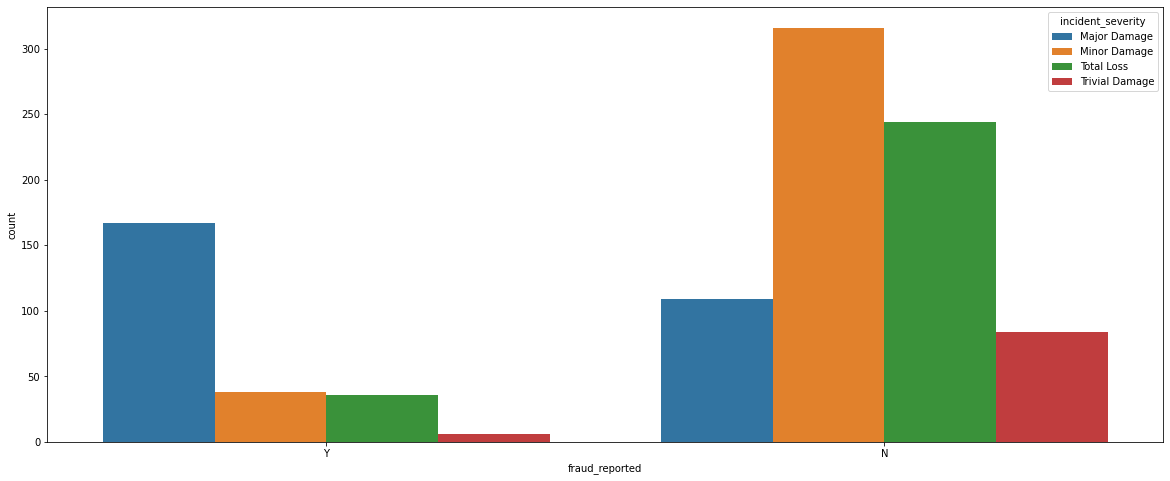

In [52]:
plt.figure(figsize=(20,8))
sns.countplot('fraud_reported',hue='incident_severity',data=df)

Fraudent cases are mainly in the Major damage cases.

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

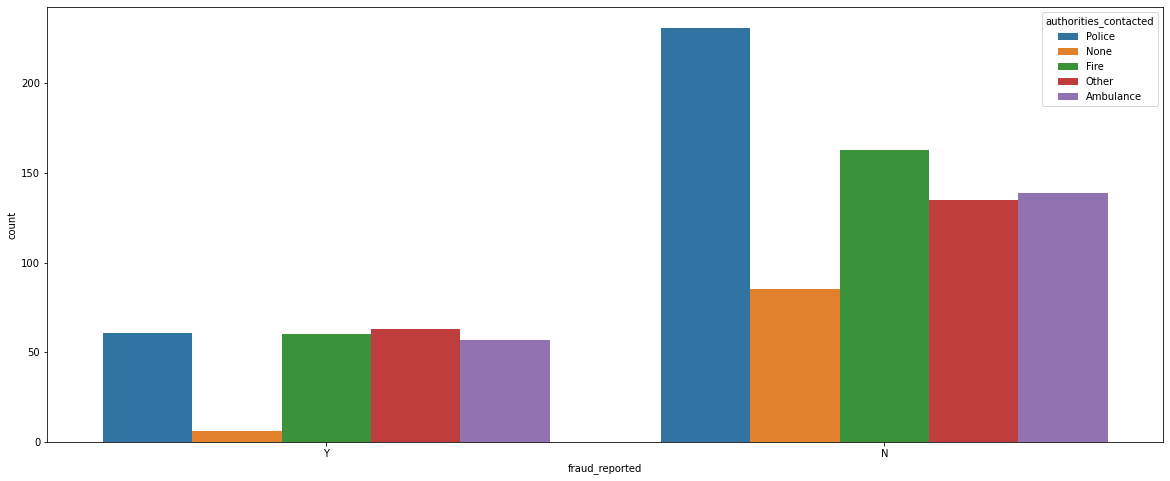

In [53]:
plt.figure(figsize=(20,8))
sns.countplot('fraud_reported',hue='authorities_contacted',data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

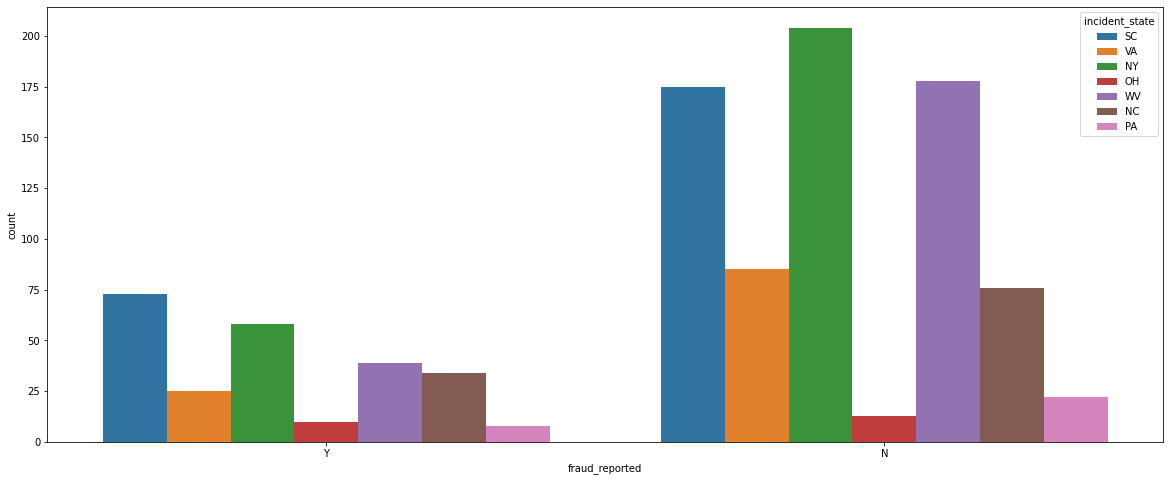

In [54]:
plt.figure(figsize=(20,8))
sns.countplot('fraud_reported',hue='incident_state',data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

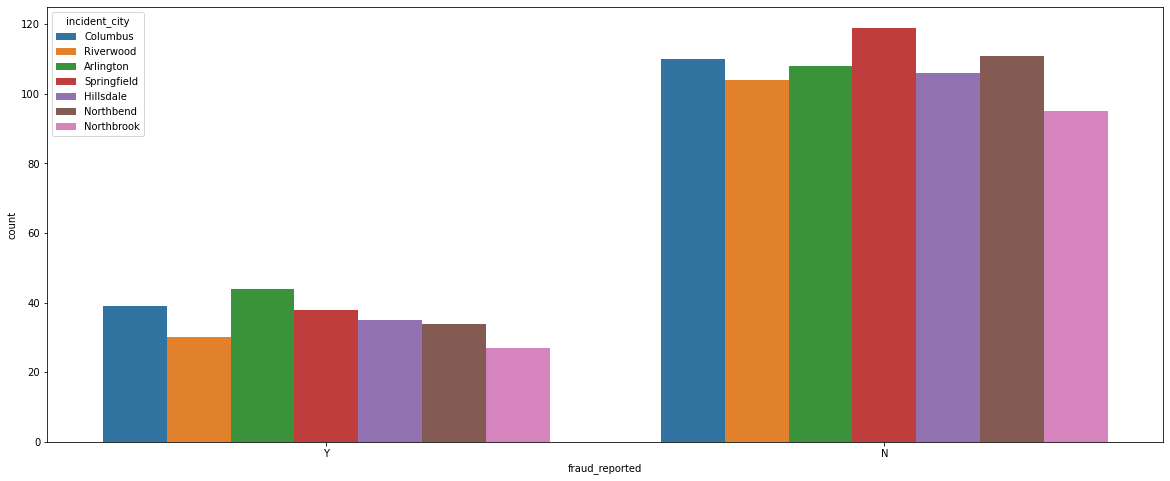

In [55]:
plt.figure(figsize=(20,8))
sns.countplot('fraud_reported',hue='incident_city',data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

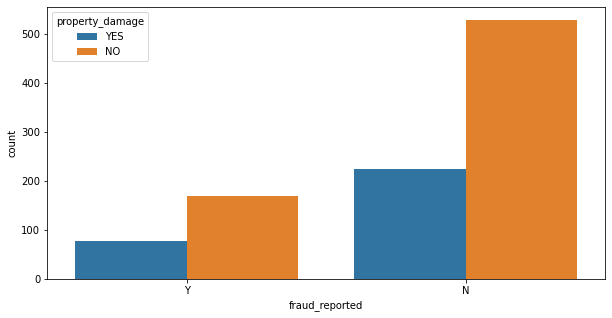

In [56]:
plt.figure(figsize=(10,5))
sns.countplot('fraud_reported',hue='property_damage',data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

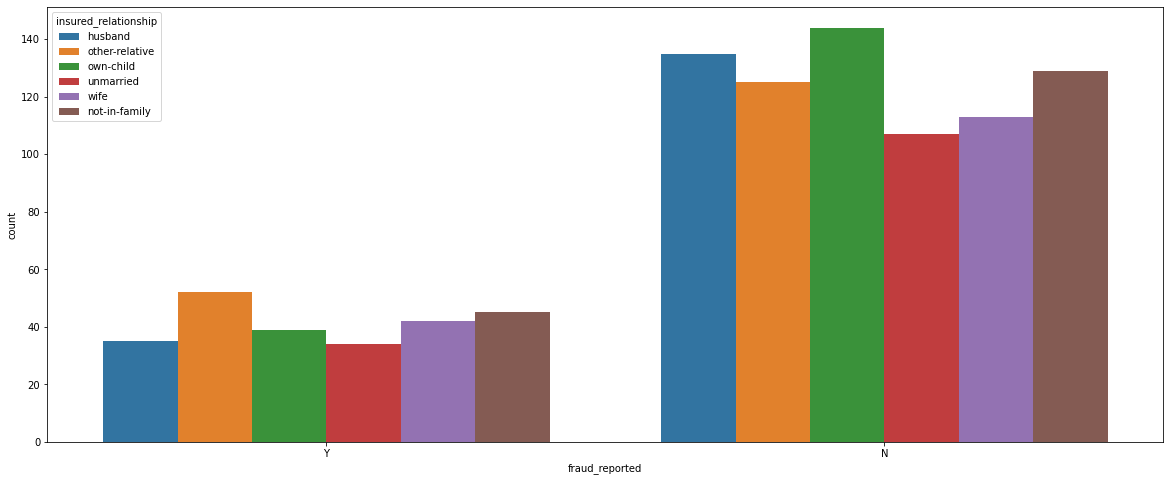

In [57]:
plt.figure(figsize=(20,8))
sns.countplot('fraud_reported',hue='insured_relationship',data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

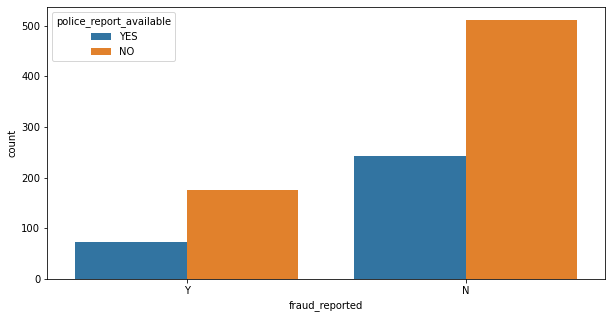

In [58]:
plt.figure(figsize=(10,5))
sns.countplot('fraud_reported',hue='police_report_available',data=df)

<AxesSubplot:xlabel='auto_make', ylabel='count'>

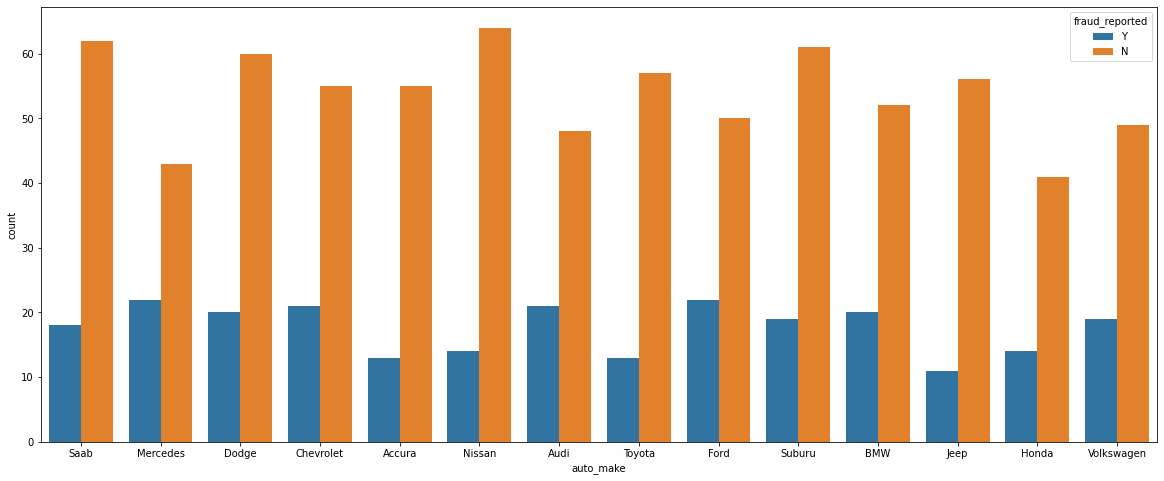

In [59]:
plt.figure(figsize=(20,8))
sns.countplot('auto_make',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='auto_model', ylabel='count'>

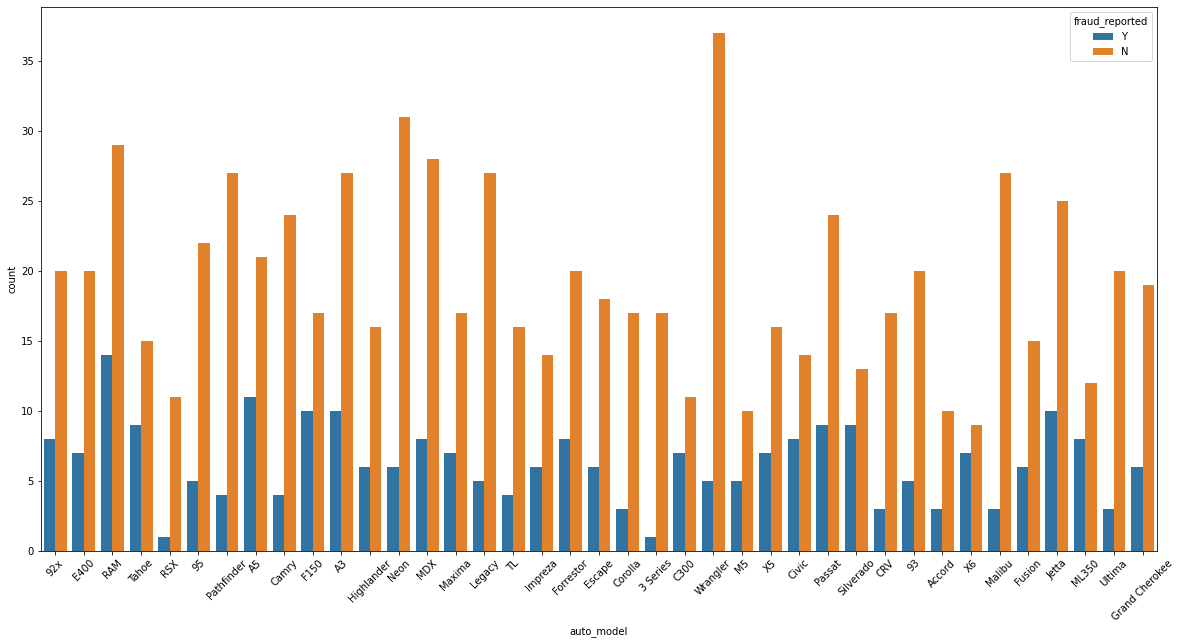

In [60]:
plt.figure(figsize=(20,10))
plt.xticks(rotation='45')
sns.countplot('auto_model',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='incident_type', ylabel='total_claim_amount'>

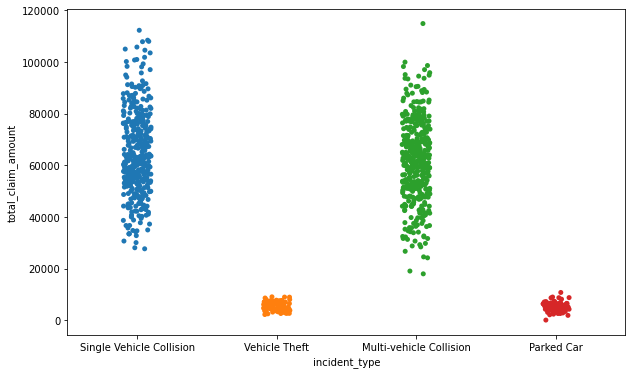

In [61]:
plt.figure(figsize=(10,6))
sns.stripplot(y='total_claim_amount',x='incident_type',data=df)

<AxesSubplot:xlabel='incident_state', ylabel='property_claim'>

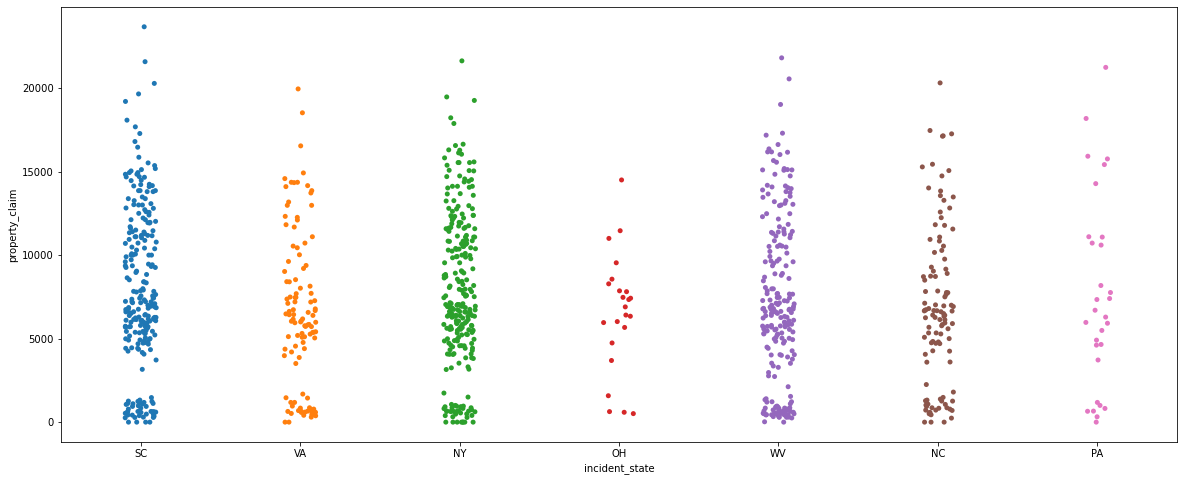

In [62]:
plt.figure(figsize=(20,8))
sns.stripplot(y='property_claim',x='incident_state',data=df)

<AxesSubplot:xlabel='incident_city', ylabel='property_claim'>

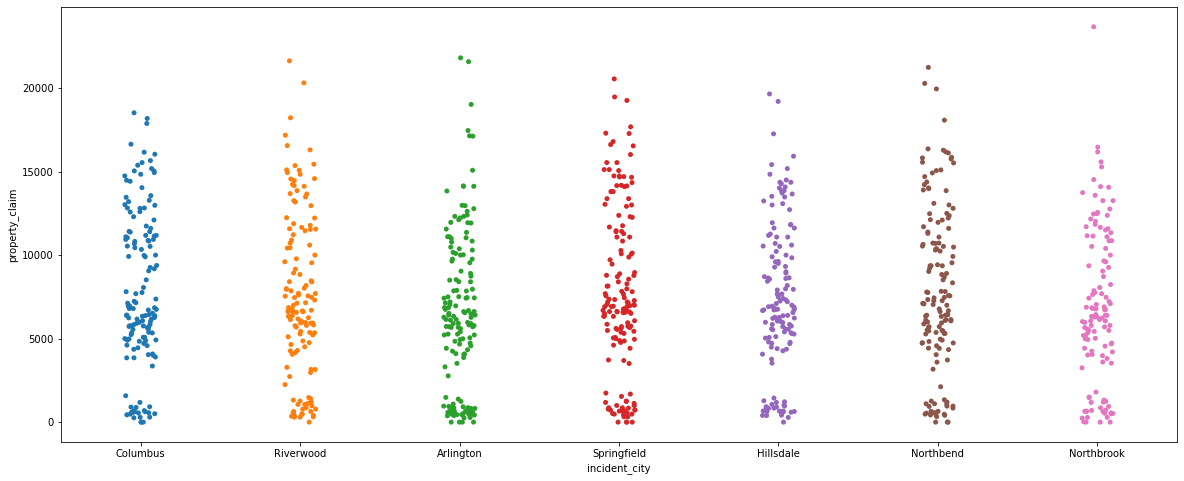

In [63]:
plt.figure(figsize=(20,8))
sns.stripplot(y='property_claim',x='incident_city',data=df)

<AxesSubplot:xlabel='incident_state', ylabel='total_claim_amount'>

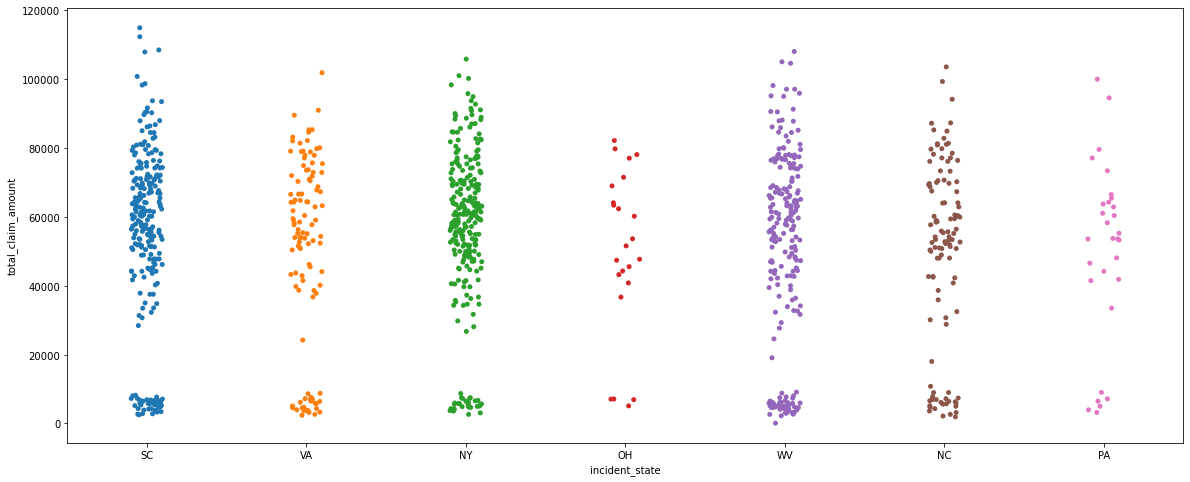

In [64]:
plt.figure(figsize=(20,8))
sns.stripplot(y='total_claim_amount',x='incident_state',data=df)

<AxesSubplot:xlabel='incident_city', ylabel='total_claim_amount'>

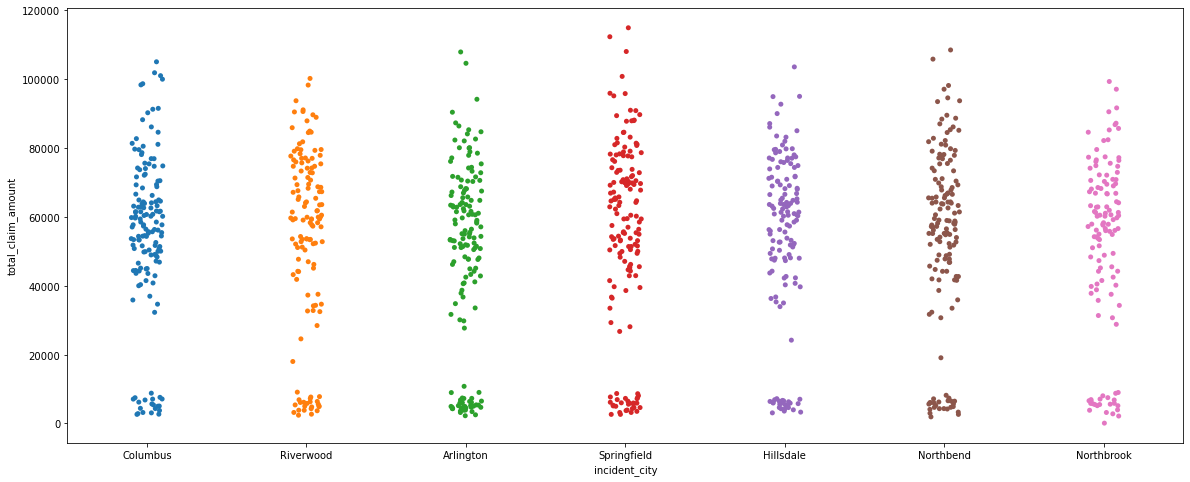

In [65]:
plt.figure(figsize=(20,8))
sns.stripplot(y='total_claim_amount',x='incident_city',data=df)

<AxesSubplot:xlabel='witnesses', ylabel='total_claim_amount'>

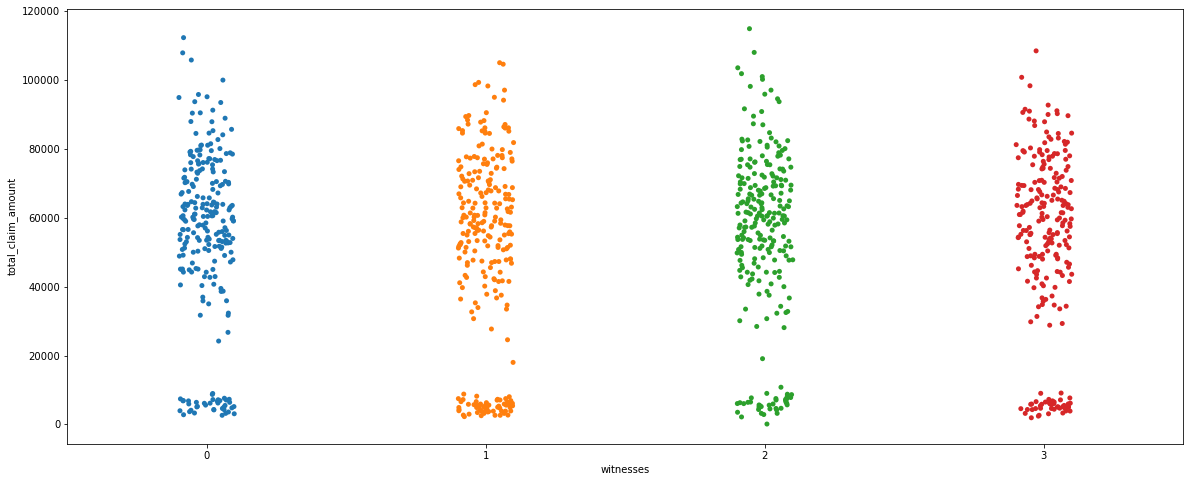

In [66]:
plt.figure(figsize=(20,8))
sns.stripplot(y='total_claim_amount',x='witnesses',data=df)

<AxesSubplot:xlabel='insured_occupation', ylabel='total_claim_amount'>

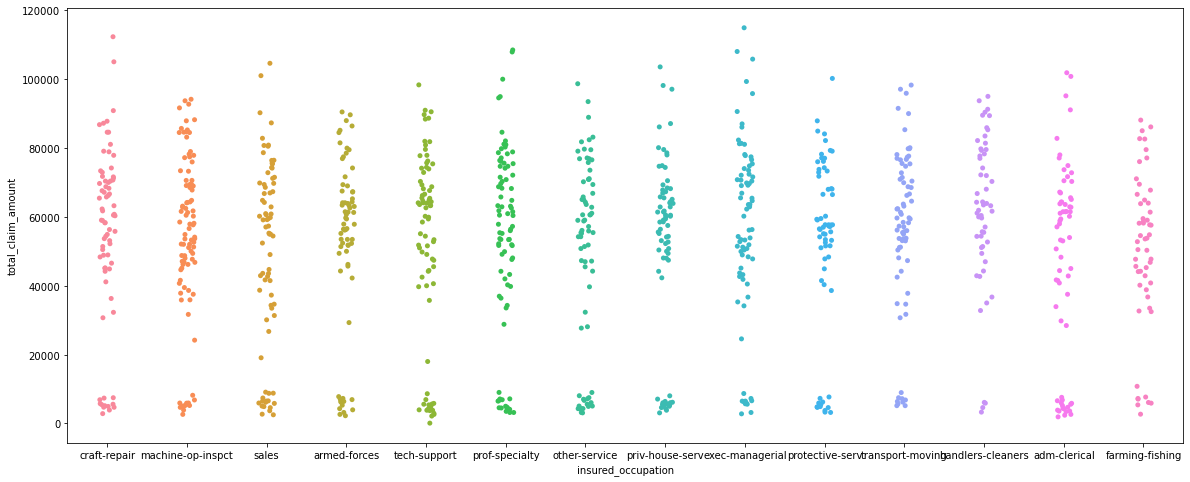

In [67]:
plt.figure(figsize=(20,8))
sns.stripplot(y='total_claim_amount',x='insured_occupation',data=df)

<AxesSubplot:xlabel='property_damage', ylabel='property_claim'>

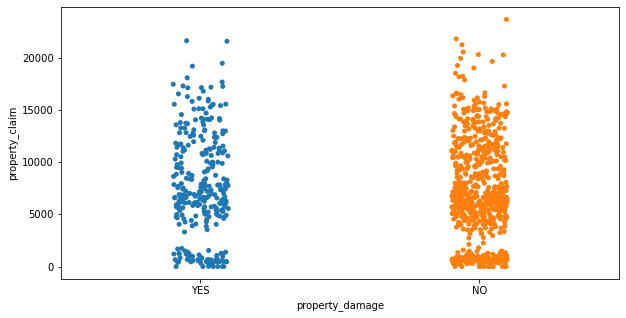

In [68]:
plt.figure(figsize=(10,5))
sns.stripplot(x='property_damage',y='property_claim',data=df)

<AxesSubplot:xlabel='age', ylabel='policy_deductable'>

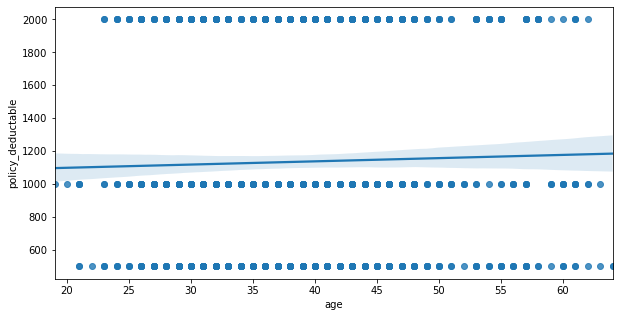

In [69]:
plt.figure(figsize=(10,5))
sns.regplot('age','policy_deductable',data=df)

<AxesSubplot:xlabel='policy_annual_premium', ylabel='capital-gains'>

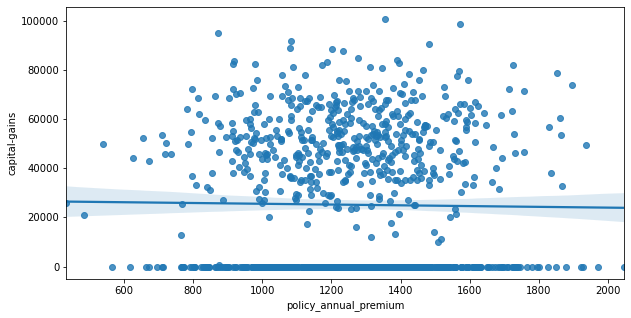

In [70]:
plt.figure(figsize=(10,5))
sns.regplot('policy_annual_premium','capital-gains',data=df)

Weak correlation between policy_annual_premium and capital-gains.

<AxesSubplot:xlabel='total_claim_amount', ylabel='vehicle_claim'>

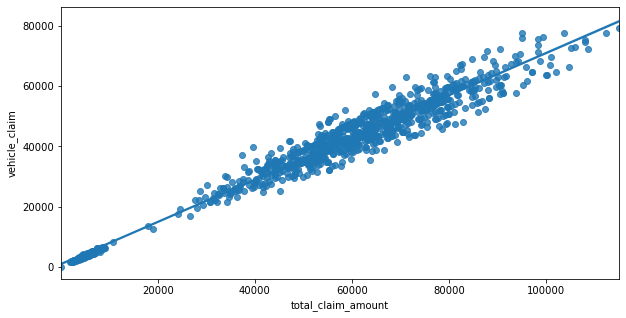

In [71]:
plt.figure(figsize=(10,5))
sns.regplot('total_claim_amount','vehicle_claim',data=df)

Vehicle_claim and total_claim_amount is linear positive correlated.

<AxesSubplot:xlabel='total_claim_amount', ylabel='property_claim'>

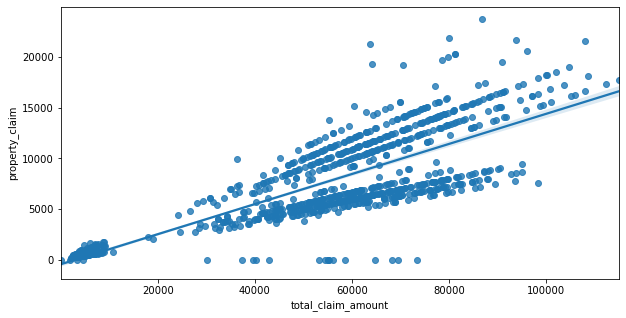

In [72]:
plt.figure(figsize=(10,5))
sns.regplot('total_claim_amount','property_claim',data=df)

Positive linear relation between total_claim_amount and property_claim.

<AxesSubplot:xlabel='total_claim_amount', ylabel='capital-loss'>

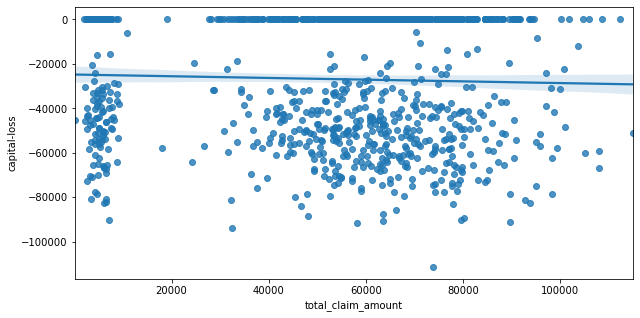

In [73]:
plt.figure(figsize=(10,5))
sns.regplot('total_claim_amount','capital-loss',data=df)

Weak relation between total_claim_amount and capital-loss.

<AxesSubplot:xlabel='injury_claim', ylabel='total_claim_amount'>

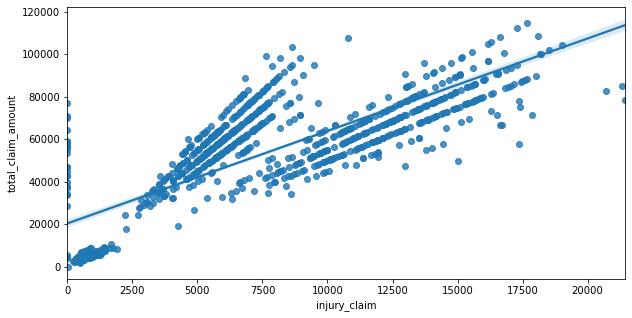

In [74]:
plt.figure(figsize=(10,5))
sns.regplot('injury_claim','total_claim_amount',data=df)

Positive linear relation between injury_claim and total_claim_amount.

<AxesSubplot:xlabel='incident_day', ylabel='incident_month'>

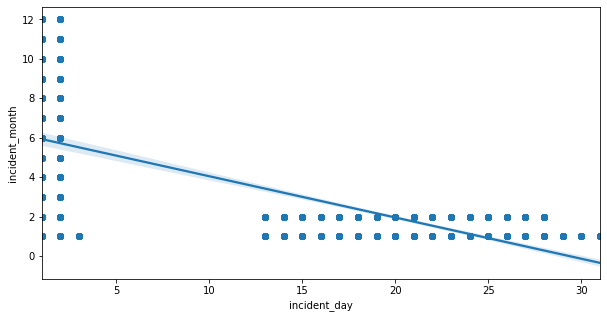

In [75]:
plt.figure(figsize=(10,5))
sns.regplot('incident_day','incident_month',data=df)

Negative linear relation between incident_day and incident_month.

In [76]:
#Encoding the categorical columns

Le=LabelEncoder()
for i in df:
    if df[i].dtypes=='object':
        df[i]=Le.fit_transform(df[i])

In [77]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,52080,10,1,2004,1,17,10,2014,25,1
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,3510,8,12,2007,1,27,6,2006,21,1
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,23100,4,30,2007,0,9,6,2000,22,2
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,50720,3,34,2014,1,25,5,1990,1,10
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,4550,0,31,2009,0,6,6,2014,17,2


In [78]:
#Finding outliers
from scipy.stats import zscore

z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 7,  7,  7,  7,  7,  6,  6,  7,  7,  7,  7, 31,  7,  7,  7,  6, 15,
        7,  7,  7], dtype=int64))


In [79]:
#Removing the outliers
dfnew=df[(z<3).all(axis=1)]
print('dfnew.shape = ',dfnew.shape)
df=dfnew

dfnew.shape =  (980, 42)


In [80]:
dataloss=((1000-980)/1000)*100
dataloss

2.0

2% Data loss after outlier removal.

In [81]:
# Separating dependent and independent variables

X=df.drop('fraud_reported',axis=1)
Y=df['fraud_reported']
print(X.shape)
print(Y.shape)

(980, 41)
(980,)


In [82]:
Y.value_counts()

0    740
1    240
Name: fraud_reported, dtype: int64

Target column is imbalanced, need to balance.

In [83]:
#Resampling using SMOTE
from imblearn.over_sampling import SMOTE

smt=SMOTE()
x,y=smt.fit_resample(X,Y)
X=x
Y=y
Y.value_counts()

0    740
1    740
Name: fraud_reported, dtype: int64

In [84]:
#Checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])] 
vif['Features']=X.columns
vif

,VIF,Features
0,3.284114e+01,months_as_customer
1,1.502023e+02,age
2,5.776382e+00,policy_number
3,2.507700e+00,policy_state
4,2.311790e+00,policy_csl
5,5.195415e+00,policy_deductable
6,3.191582e+01,policy_annual_premium
7,1.282205e+00,umbrella_limit
8,5.623526e+01,insured_zip
9,1.780648e+00,insured_sex


Multicollinearity present in incident_type,vehicle_claim.

In [85]:
#Removing vehicle_claim
X=X.drop('vehicle_claim',axis=1)

In [86]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
X_scale=scale.fit_transform(X)
X_scale

array([[ 1.11933358,  1.04687586, -0.07460652, ...,  1.83695815,
         1.29064218, -0.77491457],
       [ 0.21364962,  0.36826737, -0.77755231, ...,  0.67753683,
         0.88292597, -0.77491457],
       [-0.6376933 , -1.10205101,  0.57876408, ..., -0.19202916,
         0.98485502, -0.45166949],
       ...,
       [ 0.15930858, -0.31034111,  0.96321564, ...,  0.67753683,
        -0.13636454, -0.45166949],
       [-1.34412679, -0.64964535,  1.52223055, ...,  0.53260917,
         0.88292597, -0.77491457],
       [ 1.29141353,  1.61238293, -0.0760579 , ..., -0.19202916,
        -0.6460098 , -0.45166949]])

In [87]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

svc=SVC()
lg=LogisticRegression()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()
gb=GradientBoostingClassifier()

In [88]:
#Train test splitting
x_train,x_test,y_train,y_test=train_test_split(X_scale,Y,test_size=0.25,random_state=42)

#SVC
svc.fit(x_train,y_train)
svc.score(x_train,y_train)

0.9621621621621622

In [89]:
predsvc=svc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predsvc))
print('Confusion matrix :',confusion_matrix(y_test,predsvc))
print('Classification report :',classification_report(y_test,predsvc))

Accuracy score : 0.8378378378378378
Confusion matrix : [[149  22]
 [ 38 161]]
Classification report :               precision    recall  f1-score   support

           0       0.80      0.87      0.83       171
           1       0.88      0.81      0.84       199

    accuracy                           0.84       370
   macro avg       0.84      0.84      0.84       370
weighted avg       0.84      0.84      0.84       370



In [90]:
#Logistic regression
lg.fit(x_train,y_train)
lg.score(x_train,y_train)

0.8279279279279279

In [91]:
predlg=lg.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predlg))
print('Confusion matrix :',confusion_matrix(y_test,predlg))
print('Classification report :',classification_report(y_test,predlg))

Accuracy score : 0.8162162162162162
Confusion matrix : [[138  33]
 [ 35 164]]
Classification report :               precision    recall  f1-score   support

           0       0.80      0.81      0.80       171
           1       0.83      0.82      0.83       199

    accuracy                           0.82       370
   macro avg       0.82      0.82      0.82       370
weighted avg       0.82      0.82      0.82       370



In [92]:
#KNN
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.745945945945946

In [93]:
predknn=knn.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predknn))
print('Confusion matrix :',confusion_matrix(y_test,predknn))
print('Classification report :',classification_report(y_test,predknn))

Accuracy score : 0.727027027027027
Confusion matrix : [[ 78  93]
 [  8 191]]
Classification report :               precision    recall  f1-score   support

           0       0.91      0.46      0.61       171
           1       0.67      0.96      0.79       199

    accuracy                           0.73       370
   macro avg       0.79      0.71      0.70       370
weighted avg       0.78      0.73      0.71       370



In [94]:
#Decision tree
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)

1.0

In [95]:
preddtc=dtc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,preddtc))
print('Confusion matrix :',confusion_matrix(y_test,preddtc))
print('Classification report :',classification_report(y_test,preddtc))

Accuracy score : 0.7945945945945946
Confusion matrix : [[130  41]
 [ 35 164]]
Classification report :               precision    recall  f1-score   support

           0       0.79      0.76      0.77       171
           1       0.80      0.82      0.81       199

    accuracy                           0.79       370
   macro avg       0.79      0.79      0.79       370
weighted avg       0.79      0.79      0.79       370



In [96]:
#Random forest
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)

1.0

In [97]:
predrfc=rfc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predrfc))
print('Confusion matrix :',confusion_matrix(y_test,predrfc))
print('Classification report :',classification_report(y_test,predrfc))

Accuracy score : 0.8729729729729729
Confusion matrix : [[150  21]
 [ 26 173]]
Classification report :               precision    recall  f1-score   support

           0       0.85      0.88      0.86       171
           1       0.89      0.87      0.88       199

    accuracy                           0.87       370
   macro avg       0.87      0.87      0.87       370
weighted avg       0.87      0.87      0.87       370



In [98]:
#AdaBoost
ad.fit(x_train,y_train)
ad.score(x_train,y_train)

0.9027027027027027

In [99]:
predad=ad.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predad))
print('Confusion matrix :',confusion_matrix(y_test,predad))
print('Classification report :',classification_report(y_test,predad))

Accuracy score : 0.8297297297297297
Confusion matrix : [[145  26]
 [ 37 162]]
Classification report :               precision    recall  f1-score   support

           0       0.80      0.85      0.82       171
           1       0.86      0.81      0.84       199

    accuracy                           0.83       370
   macro avg       0.83      0.83      0.83       370
weighted avg       0.83      0.83      0.83       370



In [100]:
#GradientBoost
gb.fit(x_train,y_train)
gb.score(x_train,y_train)

0.9747747747747748

In [101]:
predgb=gb.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predgb))
print('Confusion matrix :',confusion_matrix(y_test,predgb))
print('Classification report :',classification_report(y_test,predgb))

Accuracy score : 0.8729729729729729
Confusion matrix : [[146  25]
 [ 22 177]]
Classification report :               precision    recall  f1-score   support

           0       0.87      0.85      0.86       171
           1       0.88      0.89      0.88       199

    accuracy                           0.87       370
   macro avg       0.87      0.87      0.87       370
weighted avg       0.87      0.87      0.87       370



Cross Validation

In [102]:
#SVC
score=cross_val_score(svc,X_scale,Y,cv=3)
print(score)
print(score.mean())

[0.57489879 0.86612576 0.92292089]
0.7879818128563724


In [103]:
#Logistic regression
score=cross_val_score(lg,X_scale,Y,cv=3)
print(score)
print(score.mean())

[0.61740891 0.80933063 0.86409736]
0.763612299589667


In [104]:
#KNN
score=cross_val_score(knn,X_scale,Y,cv=3)
print(score)
print(score.mean())

[0.61336032 0.69574037 0.70182556]
0.670308748935844


In [105]:
#DTC
score=cross_val_score(dtc,X_scale,Y,cv=3)
print(score)
print(score.mean())

[0.6417004  0.83772819 0.88438134]
0.7879366461089532


In [106]:
#Random forest
score=cross_val_score(rfc,X_scale,Y,cv=3)
print(score)
print(score.mean())

[0.63562753 0.86612576 0.92697769]
0.8095769928800781


In [107]:
#AdaBoost
score=cross_val_score(ad,X_scale,Y,cv=3)
print(score)
print(score.mean())

[0.5465587  0.87221095 0.91075051]
0.7765067216332295


In [108]:
#GradientBoost
score=cross_val_score(gb,X_scale,Y,cv=3)
print(score)
print(score.mean())

[0.60121457 0.84989858 0.92494929]
0.7920208150271137


Hyperparameter Tuning

In [109]:
#SVC
grid_para={'C':[0.1,0.001,1.0,1.5,2,2.8],'gamma':['scale','auto'],'kernel':['linear','poly','rbf','sigmoid'],'tol':[0.5,1,1.5,2,2.5],'random_state':[42,47,52,57]}
grid_search=GridSearchCV(estimator=svc,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 1.0, 1.5, 2, 2.8],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'random_state': [42, 47, 52, 57],
                         'tol': [0.5, 1, 1.5, 2, 2.5]})

In [110]:
best_para=grid_search.best_params_
print(best_para)

{'C': 2, 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 42, 'tol': 1}


In [112]:
svc=SVC(C=2,gamma='auto',kernel='rbf',random_state=42,tol=1,probability=True) 
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predsvc))
print('Confusion matrix',confusion_matrix(y_test,predsvc))
print('Classification report :',classification_report(y_test,predsvc))

Accuracy score : 0.8594594594594595
Confusion matrix [[151  20]
 [ 32 167]]
Classification report :               precision    recall  f1-score   support

           0       0.83      0.88      0.85       171
           1       0.89      0.84      0.87       199

    accuracy                           0.86       370
   macro avg       0.86      0.86      0.86       370
weighted avg       0.86      0.86      0.86       370



In [113]:
#Logistic Regression
grid_para={'penalty':['l1','l2','elasticnet'],'C':[0.1,0.001,1.0,1.5,2.8],'solver':['newton-cg','lbfgs','sag','saga'],'multi_class':['auto','ovr','multinomial'],'max_iter':range(2,20,1)}
grid_search=GridSearchCV(estimator=lg,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.001, 1.0, 1.5, 2.8],
                         'max_iter': range(2, 20),
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']})

In [114]:
best_para=grid_search.best_params_
print(best_para)

{'C': 1.0, 'max_iter': 5, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'saga'}


In [115]:
lg=LogisticRegression(C=1.0,max_iter=5,multi_class='multinomial',penalty='l2',solver='saga') 
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predlg))
print('Confusion matrix',confusion_matrix(y_test,predlg))
print('Classification report :',classification_report(y_test,predlg))

Accuracy score : 0.8135135135135135
Confusion matrix [[137  34]
 [ 35 164]]
Classification report :               precision    recall  f1-score   support

           0       0.80      0.80      0.80       171
           1       0.83      0.82      0.83       199

    accuracy                           0.81       370
   macro avg       0.81      0.81      0.81       370
weighted avg       0.81      0.81      0.81       370



In [116]:
#KNN
grid_para={'algorithm':['auto','ball_tree','kd_tree','brute'],'n_neighbors':range(2,20,1),'weights':['uniform','distance'],'leaf_size':range(1,20,1)}
grid_search=GridSearchCV(estimator=knn,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': range(1, 20), 'n_neighbors': range(2, 20),
                         'weights': ['uniform', 'distance']})

In [117]:
best_para=grid_search.best_params_
print(best_para)

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 2, 'weights': 'uniform'}


In [118]:
knn=KNeighborsClassifier(algorithm='auto',n_neighbors=2,weights='uniform',leaf_size=1)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predknn))
print('Confusion matrix :',confusion_matrix(y_test,predknn))
print('Classification report :',classification_report(y_test,predknn))

Accuracy score : 0.8108108108108109
Confusion matrix : [[117  54]
 [ 16 183]]
Classification report :               precision    recall  f1-score   support

           0       0.88      0.68      0.77       171
           1       0.77      0.92      0.84       199

    accuracy                           0.81       370
   macro avg       0.83      0.80      0.80       370
weighted avg       0.82      0.81      0.81       370



In [119]:
#DTC
grid_para={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':range(1,20,2),'min_samples_split':range(2,20,2),'max_features':['auto','sqrt','log2']}
grid_search=GridSearchCV(estimator=dtc,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20, 2),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': range(2, 20, 2),
                         'splitter': ['best', 'random']})

In [120]:
best_para=grid_search.best_params_
print(best_para)

{'criterion': 'entropy', 'max_depth': 17, 'max_features': 'sqrt', 'min_samples_split': 18, 'splitter': 'best'}


In [121]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=17,max_features='sqrt',min_samples_split=18,splitter='best')
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,preddtc))
print('Confusion matrix :',confusion_matrix(y_test,preddtc))
print('Classification report :',classification_report(y_test,preddtc))

Accuracy score : 0.8297297297297297
Confusion matrix : [[138  33]
 [ 30 169]]
Classification report :               precision    recall  f1-score   support

           0       0.82      0.81      0.81       171
           1       0.84      0.85      0.84       199

    accuracy                           0.83       370
   macro avg       0.83      0.83      0.83       370
weighted avg       0.83      0.83      0.83       370



In [122]:
#Random forest
grid_para={'criterion':['gini','entropy'],'min_samples_split':range(1,10,1),'bootstrap':[True,False],'max_features': ['auto','log2','sqrt']}
grid_search=GridSearchCV(estimator=rfc,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_split': range(1, 10)})

In [123]:
best_para=grid_search.best_params_
print(best_para)

{'bootstrap': False, 'criterion': 'entropy', 'max_features': 'log2', 'min_samples_split': 5}


In [124]:
rfc=RandomForestClassifier(bootstrap=False,criterion='entropy',max_features='log2',min_samples_split=5)
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predrfc))
print('Confusion matrix :',confusion_matrix(y_test,predrfc))
print('Classification report :',classification_report(y_test,predrfc))

Accuracy score : 0.8702702702702703
Confusion matrix : [[150  21]
 [ 27 172]]
Classification report :               precision    recall  f1-score   support

           0       0.85      0.88      0.86       171
           1       0.89      0.86      0.88       199

    accuracy                           0.87       370
   macro avg       0.87      0.87      0.87       370
weighted avg       0.87      0.87      0.87       370



In [125]:
#AdaBoost
grid_para={'base_estimator':[svc,dtc,rfc],'n_estimators':[50,60,70],'learning_rate':[0.001,0.01,0.1,1.0,1.5],'algorithm':['SAMME','SAMME.R']}
grid_search=GridSearchCV(estimator=ad,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'base_estimator': [SVC(C=2, gamma='auto',
                                                probability=True,
                                                random_state=42, tol=1),
                                            DecisionTreeClassifier(criterion='entropy',
                                                                   max_depth=17,
                                                                   max_features='sqrt',
                                                                   min_samples_split=18),
                                            RandomForestClassifier(bootstrap=False,
                                                                   criterion='entropy',
                                                                   max_features='log2',
                                                                   min_sampl

In [126]:
best_para=grid_search.best_params_
print(best_para)

{'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(criterion='entropy', max_depth=17, max_features='sqrt',
                       min_samples_split=18), 'learning_rate': 1.0, 'n_estimators': 60}


In [127]:
ad=AdaBoostClassifier(algorithm='SAMME',base_estimator=DecisionTreeClassifier(criterion='entropy',max_depth=17,max_features='sqrt',min_samples_split=18),learning_rate=1.0,n_estimators=60)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predad))
print('Confusion matrix :',confusion_matrix(y_test,predad))
print('Classification report :',classification_report(y_test,predad))

Accuracy score : 0.8729729729729729
Confusion matrix : [[153  18]
 [ 29 170]]
Classification report :               precision    recall  f1-score   support

           0       0.84      0.89      0.87       171
           1       0.90      0.85      0.88       199

    accuracy                           0.87       370
   macro avg       0.87      0.87      0.87       370
weighted avg       0.87      0.87      0.87       370



In [128]:
#GradientBoost
grid_para={'learning_rate':[0.001,0.01,0.1,1.0,1.5],'loss':['deviance','exponential'],'subsample':[0.1,1.0,1.5,2.0],'max_depth':[2,5,7,10],'max_features': ['auto','log2','sqrt']}
grid_search=GridSearchCV(estimator=gb,param_grid=grid_para,cv=3)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0, 1.5],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [2, 5, 7, 10],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'subsample': [0.1, 1.0, 1.5, 2.0]})

In [129]:
best_para=grid_search.best_params_
print(best_para)

{'learning_rate': 1.0, 'loss': 'deviance', 'max_depth': 5, 'max_features': 'auto', 'subsample': 1.0}


In [130]:
gb=GradientBoostingClassifier(learning_rate=1.0,loss='deviance',max_depth=5,max_features='auto',subsample=1.0)
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,predgb))
print('Confusion matrix :',confusion_matrix(y_test,predgb))
print('Classification report :',classification_report(y_test,predgb))

Accuracy score : 0.8945945945945946
Confusion matrix : [[149  22]
 [ 17 182]]
Classification report :               precision    recall  f1-score   support

           0       0.90      0.87      0.88       171
           1       0.89      0.91      0.90       199

    accuracy                           0.89       370
   macro avg       0.89      0.89      0.89       370
weighted avg       0.89      0.89      0.89       370



ROC Curve

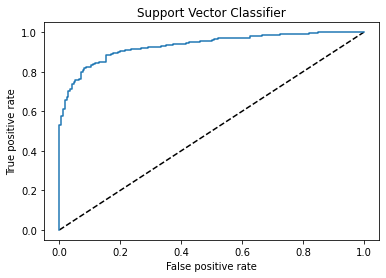

0.861118457786006

In [131]:
#SVC
predsvc_prob=svc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,predsvc_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Support Vector Classifier")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Support Vector Classifier')
plt.show()
auc_score=roc_auc_score(y_test,svc.predict(x_test))
auc_score

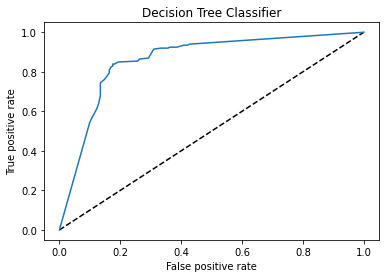

0.8281318875077142

In [132]:
#DTC
preddtc_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,preddtc_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Decision Tree Classifier")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
auc_score

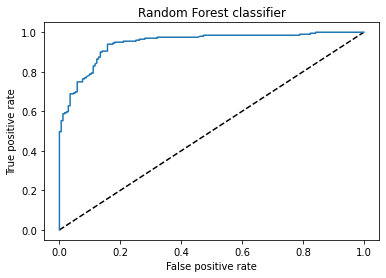

0.8707572952481708

In [133]:
#Random Forest
predrfc_prob=rfc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,predrfc_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random Forest Classifier")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest classifier')
plt.show()
auc_score=roc_auc_score(y_test,rfc.predict(x_test))
auc_score

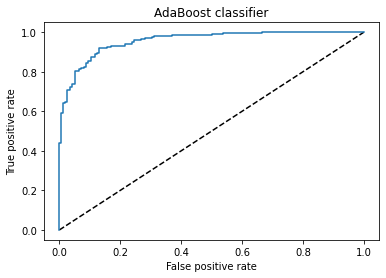

0.8745040994445913

In [135]:
#AdaBoost
predad_prob=ad.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,predad_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="AdaBoost Classifier")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AdaBoost classifier')
plt.show()
auc_score=roc_auc_score(y_test,ad.predict(x_test))
auc_score

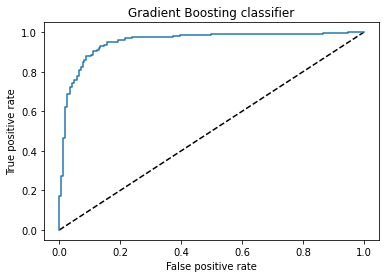

0.892958946780687

In [134]:
#GradientBoosting
predgb_prob=gb.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,predgb_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Gradient Boosting Classifier")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Gradient Boosting classifier')
plt.show()
auc_score=roc_auc_score(y_test,gb.predict(x_test))
auc_score

The Support vector classifier model Accuracy score is 85.94% and AUC score is 86.11%.

The Random Forest classifier model Accuracy score is 87.02% and AUC score is 86.61%.

The AdaBoost classifier model Accuracy score is 87.29% and AUC score is 87.45%.

The Gradient Boosting classifier model Accuracy score is 89.45% and AUC score is 89.29%.

In [142]:
#AdaBoost
score=cross_val_score(ad,X_scale,Y,cv=3)
print(score)
print(score.mean())

[0.67206478 0.89858012 0.94929006]
0.8399783199612387


In [143]:
#GradientBoost
score=cross_val_score(gb,X_scale,Y,cv=3)
print(score)
print(score.mean())

[0.6194332  0.87829615 0.92697769]
0.8082356773506554


In [144]:
#Random forest
score=cross_val_score(rfc,X_scale,Y,cv=3)
print(score)
print(score.mean())

[0.63360324 0.88843813 0.93914807]
0.8203964819209828


AdaBoost model is the best model with Accuracy score 87.29%, AUC score 87.45% and cross validation score 83.99%.

In [145]:
import pickle
filename="Insurance Fraud Detection.pkl"
pickle.dump(ad,open(filename, 'wb'))

Conclusion

In [146]:
model=pickle.load(open("Insurance Fraud Detection.pkl",'rb'))
result=model.score(x_test,y_test)
print('The Accuracy score of the model : ',result*100)

The Accuracy score of the model :  87.29729729729729


In [147]:
Accuracy=pd.DataFrame([model.predict(x_test),predad],index=['Predicted','Original'])
Accuracy

,0,1,2,3,4,5,6,7,8,9,...,360,361,362,363,364,365,366,367,368,369
Predicted,0,0,0,0,1,1,1,1,0,0,...,1,1,1,0,0,1,0,1,1,0
Original,0,0,0,0,1,1,1,1,0,0,...,1,1,1,0,0,1,0,1,1,0
